In [1]:
#load libraries, dependencies
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols # Ordinary Least Squares (OLS) model
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ANOVA_merged.csv")
df

,SampleID,CHL1_OID01216,NRP1_OID01217,PLXNB2_OID01218,FCGR3B_OID01219,LILRB5_OID01220,APOM_OID01221,SOD1_OID01222,CA1_OID01223,TIMP1_OID01224,...,FABP9_OID01115,TMPRSS15_OID01116,LHB_OID01117,FOSB_OID01118,CALR_OID01119,PGF_OID01493,Subject,Response,Site,Time
0,A1,12.956143,3.729709,2.086122,11.609629,0.724192,8.542624,9.452978,7.795929,3.116308,...,5.698748,1.640175,1.187713,3.843168,1.278116,2.457126,ID1,Nonresponder,Site_D,Baseline
1,A2,11.269477,6.144801,1.483985,17.582141,3.329488,10.395668,7.704559,6.388902,0.793348,...,5.751120,1.433037,2.068403,2.972200,4.908331,3.756646,ID1,Nonresponder,Site_D,Week.6
2,A3,25.451070,6.950510,1.228214,10.494904,4.392219,14.669500,11.206255,1.333532,3.839500,...,9.776941,2.514728,0.530500,0.803449,5.720805,2.195161,ID1,Nonresponder,Site_D,Week.12
3,A4,14.453038,3.725393,3.278853,14.969670,1.132330,16.194933,12.066842,-0.580701,4.565457,...,8.191348,4.953789,1.588413,1.929322,6.883288,2.552394,ID2,Nonresponder,Site_C,Baseline
4,A5,7.628712,7.198343,4.989030,13.087540,1.237068,15.074472,2.201737,2.005555,4.600080,...,5.697130,1.292394,1.370663,2.180779,13.823078,1.381204,ID2,Nonresponder,Site_C,Week.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,B75,13.024688,3.918886,3.163334,11.961131,1.396265,7.350203,19.334173,2.183027,4.348268,...,7.463973,3.605572,2.263226,3.107379,11.549792,4.065760,ID51,Nonresponder,Site_A,Week.6
152,B76,12.651836,9.767998,3.262239,14.746187,4.040677,13.739613,8.324083,-0.940497,2.920415,...,6.148645,4.861764,1.012678,2.734845,7.009428,3.234534,ID51,Nonresponder,Site_A,Week.12
153,B77,9.975178,8.553449,4.280947,9.935137,-1.353013,14.539348,18.308870,3.671944,4.036374,...,4.545576,7.561058,2.832326,6.894978,9.119377,1.562843,ID52,Responder,Site_B,Baseline
154,B78,12.819363,6.103985,3.618611,5.405530,1.842243,2.258826,13.683191,2.474751,4.637519,...,5.108254,1.430722,2.790248,5.766232,6.157426,1.856033,ID52,Responder,Site_B,Week.6


In [3]:
# create Responder dataframe and set the index to the SampleID column
df_response = df.loc[df["Response"] == "Responder"]
df_response = df_response.set_index("SampleID")

# create nonresponder dataframe and set the index to the SampleID column
df_NR = df.loc[df["Response"] == "Nonresponder"]
df_NR = df_NR.set_index("SampleID")

# create Site dataframe and set the index to the SampleID column
df_Site = df.loc[df["Time"] == "Baseline"]
df_Site = df_Site.set_index("SampleID")

In [4]:
df_response

,CHL1_OID01216,NRP1_OID01217,PLXNB2_OID01218,FCGR3B_OID01219,LILRB5_OID01220,APOM_OID01221,SOD1_OID01222,CA1_OID01223,TIMP1_OID01224,CST3_OID01225,...,FABP9_OID01115,TMPRSS15_OID01116,LHB_OID01117,FOSB_OID01118,CALR_OID01119,PGF_OID01493,Subject,Response,Site,Time
SampleID,,,,,,,,,,,,,,,,,,,,,
A16,11.431302,10.207661,3.311984,10.313994,3.526815,13.334769,10.661415,3.454648,4.788196,9.268302,...,6.619953,4.255823,1.365903,4.198838,9.932363,1.203303,ID6,Responder,Site_D,Baseline
A17,9.745531,3.234661,3.780135,4.826243,1.886590,15.829464,7.641103,6.842145,6.775038,10.627710,...,9.504588,6.542672,2.296388,3.239329,13.900062,2.391151,ID6,Responder,Site_D,Week.6
A18,10.631295,8.808551,3.740067,20.919796,0.853839,5.589258,10.256434,6.054641,5.189150,14.001674,...,5.092211,2.592408,1.717529,3.352125,8.710175,2.696352,ID6,Responder,Site_D,Week.12
A22,14.413956,4.499181,2.157865,11.475391,5.275544,8.329090,9.415025,4.355936,1.821448,3.862319,...,8.651560,4.555464,2.556959,4.786705,7.431784,4.816519,ID8,Responder,Site_D,Baseline
A23,16.710825,6.563803,1.885564,11.241045,4.885964,6.201427,8.990009,6.098669,3.703675,7.623529,...,6.781035,-0.302136,1.883831,1.855008,8.347734,4.862274,ID8,Responder,Site_D,Week.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B72,5.882346,11.388225,-0.599872,1.775421,7.611801,13.148213,9.304414,2.110362,5.602710,7.587523,...,6.131907,2.705612,1.936448,1.012736,9.192695,3.511939,ID50,Responder,Site_B,Week.6
B73,7.506983,9.413361,-0.036989,9.881755,6.484933,8.105241,14.910704,1.080454,4.795368,11.803293,...,7.285554,3.784381,2.111411,2.968140,8.659603,5.063345,ID50,Responder,Site_B,Week.12
B77,9.975178,8.553449,4.280947,9.935137,-1.353013,14.539348,18.308870,3.671944,4.036374,7.545368,...,4.545576,7.561058,2.832326,6.894978,9.119377,1.562843,ID52,Responder,Site_B,Baseline


In [5]:
# create list of all ProteinIDs to use in ANOVA 'value_vars' for stacked dataframe format
protName_df = df_response.drop(["Subject", "Response", "Site", "Time"], axis=1)
protein_list = protName_df.columns.tolist()
#protein_list

In [6]:
# reshape the df_response dataframe suitable (stacked format) for statsmodels package 
Responder_melt = pd.melt(df_response, id_vars=['Time'], value_vars=protein_list)
# replace column names
Responder_melt.columns = ['Time', 'Protein', 'NPX']
Responder_melt.dropna(inplace=True)
Responder_melt['NPX'] = Responder_melt['NPX'].apply(pd.to_numeric)
Responder_melt

,Time,Protein,NPX
0,Baseline,CHL1_OID01216,11.431302
1,Week.6,CHL1_OID01216,9.745531
2,Week.12,CHL1_OID01216,10.631295
3,Baseline,CHL1_OID01216,14.413956
4,Week.6,CHL1_OID01216,16.710825
...,...,...,...
76171,Week.6,PGF_OID01493,3.511939
76172,Week.12,PGF_OID01493,5.063345
76173,Baseline,PGF_OID01493,1.562843
76174,Week.6,PGF_OID01493,1.856033


In [7]:
# reshape the df_NR dataframe suitable (stacked format) for statsmodels package 
NR_melt = pd.melt(df_NR, id_vars=['Time'], value_vars=protein_list)
# replace column names
NR_melt.columns = ['Time', 'Protein', 'NPX']
NR_melt.dropna(inplace=True)
NR_melt['NPX'] = NR_melt['NPX'].apply(pd.to_numeric)
NR_melt.dtypes

Time        object
Protein     object
NPX        float64
dtype: object

In [8]:
# reshape the df_Site dataframe suitable (stacked format) for statsmodels package 
Site_melt = pd.melt(df_Site, id_vars=['Site'], value_vars=protein_list)
# replace column names
Site_melt.columns = ['Site', 'Protein', 'NPX']
Site_melt.dropna(inplace=True)
Site_melt['NPX'] = Site_melt['NPX'].apply(pd.to_numeric)
Site_melt.dtypes

Site        object
Protein     object
NPX        float64
dtype: object

In [9]:
Site_melt

,Site,Protein,NPX
0,Site_D,CHL1_OID01216,12.956143
1,Site_C,CHL1_OID01216,14.453038
2,Site_D,CHL1_OID01216,12.730612
3,Site_B,CHL1_OID01216,12.258445
4,Site_B,CHL1_OID01216,7.748904
...,...,...,...
57403,Site_C,PGF_OID01493,4.889052
57404,Site_E,PGF_OID01493,1.766627
57405,Site_B,PGF_OID01493,4.048524
57406,Site_A,PGF_OID01493,4.027856


In [10]:
test_data = Site_melt.loc[Site_melt["Protein"] == "PDCD1_OID01098"]
test_data

,Site,Protein,NPX
56212,Site_D,PDCD1_OID01098,4.852205
56213,Site_C,PDCD1_OID01098,8.904216
56214,Site_D,PDCD1_OID01098,9.424724
56215,Site_B,PDCD1_OID01098,16.094459
56216,Site_B,PDCD1_OID01098,13.830650
56217,Site_D,PDCD1_OID01098,3.497658
56218,Site_D,PDCD1_OID01098,8.040242
56219,Site_D,PDCD1_OID01098,12.531948
56220,Site_E,PDCD1_OID01098,11.356532
56221,Site_E,PDCD1_OID01098,15.394883


In [11]:
test_data.dtypes

Site        object
Protein     object
NPX        float64
dtype: object

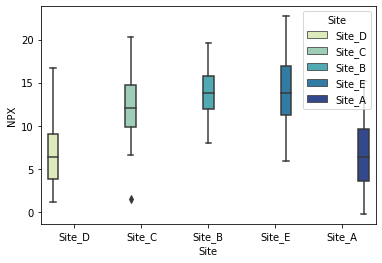

In [12]:
# generate a boxplot to see the data distribution by Time 
sns.boxplot(x="Site", y="NPX", hue="Site", data=test_data, palette="YlGnBu")

In [13]:
# C(Site):C(Uniprot ID) represent interaction term
model = ols('NPX ~ C(Site)', data=test_data).fit()

# Type 3 sums of squares (SS) ('typ=3') is recommended for an unbalanced design for multifactorial ANOVA
anova_table_test = sm.stats.anova_lm(model, typ=2)
anova_table_test

,sum_sq,df,F,PR(>F)
C(Site),479.473349,4.0,5.681956,0.000816
Residual,991.526899,47.0,NaN,NaN


In [14]:
anova_table_test.dtypes

sum_sq    float64
df        float64
F         float64
PR(>F)    float64
dtype: object

## Responder ANOVA by all Proteins

In [15]:
# anova_protein = {"Protein":[], "ANOVA":[]}
# for protein in protein_list:
#     data = Responder_melt.loc[Responder_melt["Protein"] == protein]
#     model = ols('NPX ~ C(Time)', data=data).fit()
#     anova_table = sm.stats.anova_lm(model, typ=2)
#     anova_protein["Protein"].append(protein)
#     anova_protein["ANOVA"].append(anova_table)


In [16]:
anova_protein = {"Protein":[], "C(Time): sum_sq":[],
"Residual: sum_sq": [], "C(Time): df":[], "Residual: df":[], 
"C(Time): F":[], "Residual: F":[],
"C(Time): PR(>F)":[], "Residual: PR(>F)":[]}

for protein in protein_list:
    data = Responder_melt.loc[Responder_melt["Protein"] == protein]
    model = ols('NPX ~ C(Time)', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_protein["Protein"].append(protein)
    anova_protein["C(Time): sum_sq"].append(anova_table["sum_sq"][0])
    anova_protein["Residual: sum_sq"].append(anova_table["sum_sq"][1])
    anova_protein["C(Time): df"].append(anova_table["df"][0])
    anova_protein["Residual: df"].append(anova_table["df"][1])
    anova_protein["C(Time): F"].append(anova_table["F"][0])
    anova_protein["Residual: F"].append(anova_table["F"][1])
    anova_protein["C(Time): PR(>F)"].append(anova_table["PR(>F)"][0])
    anova_protein["Residual: PR(>F)"].append(anova_table["PR(>F)"][1])

In [17]:
anova_responder_df = pd.DataFrame(anova_protein)
anova_responder_df.head()

,Protein,C(Time): sum_sq,Residual: sum_sq,C(Time): df,Residual: df,C(Time): F,Residual: F,C(Time): PR(>F),Residual: PR(>F)
0,CHL1_OID01216,33.772532,944.790646,2.0,66.0,1.179620,NaN,0.313792,NaN
1,NRP1_OID01217,6.660551,614.762356,2.0,66.0,0.357534,NaN,0.700745,NaN
2,PLXNB2_OID01218,3.092323,124.203790,2.0,66.0,0.821607,NaN,0.444171,NaN
3,FCGR3B_OID01219,432.837493,1607.112364,2.0,66.0,8.887765,NaN,0.000382,NaN
4,LILRB5_OID01220,11.007607,474.192702,2.0,66.0,0.766041,NaN,0.468938,NaN


In [18]:
anova_responder_df.loc[anova_responder_df["C(Time): PR(>F)"] < 0.05]

,Protein,C(Time): sum_sq,Residual: sum_sq,C(Time): df,Residual: df,C(Time): F,Residual: F,C(Time): PR(>F),Residual: PR(>F)
3,FCGR3B_OID01219,432.837493,1607.112364,2.0,66.0,8.887765,NaN,0.000382,NaN
16,SERPINA7_OID01232,174.341448,993.282144,2.0,66.0,5.792179,NaN,0.004813,NaN
17,C2_OID01233,86.301679,742.087961,2.0,66.0,3.837760,NaN,0.026502,NaN
32,CD59_OID01248,68.527530,192.752379,2.0,66.0,11.732195,NaN,0.000044,NaN
36,ST6GAL1_OID01252,6.754234,68.113464,2.0,66.0,3.272330,NaN,0.044154,NaN
...,...,...,...,...,...,...,...,...,...
1071,MAX_OID01088,254.227825,1519.970739,2.0,66.0,5.519526,NaN,0.006074,NaN
1083,SERPINA9_OID01100,88.357134,199.916506,2.0,66.0,14.585016,NaN,0.000006,NaN
1091,CNTN2_OID01108,57.340437,556.152952,2.0,66.0,3.402363,NaN,0.039236,NaN
1099,TMPRSS15_OID01116,76.474385,309.695017,2.0,66.0,8.148839,NaN,0.000687,NaN


In [19]:
# anova_protein["ANOVA"][1100]

## Nonresponder (NR) ANOVA by all Proteins

In [35]:
# run ANOVA for all proteins for NR data
# anova_NR = {"Protein":[], "ANOVA":[]}
# for protein in protein_list:
#     data = NR_melt.loc[NR_melt["Protein"] == protein]
#     model = ols('NPX ~ C(Time)', data=data).fit()
#     anova_table = sm.stats.anova_lm(model, typ=2)
#     anova_NR["Protein"].append(protein)
#     anova_NR["ANOVA"].append(anova_table)

In [20]:
anova_NR = {"Protein":[], "C(Time): sum_sq":[],
"Residual: sum_sq": [], "C(Time): df":[], "Residual: df":[], 
"C(Time): F":[], "Residual: F":[],
"C(Time): PR(>F)":[], "Residual: PR(>F)":[]}

for protein in protein_list:
    data = NR_melt.loc[NR_melt["Protein"] == protein]
    model = ols('NPX ~ C(Time)', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_NR["Protein"].append(protein)
    anova_NR["C(Time): sum_sq"].append(anova_table["sum_sq"][0])
    anova_NR["Residual: sum_sq"].append(anova_table["sum_sq"][1])
    anova_NR["C(Time): df"].append(anova_table["df"][0])
    anova_NR["Residual: df"].append(anova_table["df"][1])
    anova_NR["C(Time): F"].append(anova_table["F"][0])
    anova_NR["Residual: F"].append(anova_table["F"][1])
    anova_NR["C(Time): PR(>F)"].append(anova_table["PR(>F)"][0])
    anova_NR["Residual: PR(>F)"].append(anova_table["PR(>F)"][1])

In [21]:
anova_NR_df = pd.DataFrame(anova_NR)
anova_NR_df.head()

,Protein,C(Time): sum_sq,Residual: sum_sq,C(Time): df,Residual: df,C(Time): F,Residual: F,C(Time): PR(>F),Residual: PR(>F)
0,CHL1_OID01216,31.279592,1310.759969,2.0,84.0,1.002276,NaN,0.371390,NaN
1,NRP1_OID01217,37.320825,1127.021510,2.0,84.0,1.390812,NaN,0.254544,NaN
2,PLXNB2_OID01218,1.172355,121.671278,2.0,84.0,0.404688,NaN,0.668479,NaN
3,FCGR3B_OID01219,29.695964,2664.347850,2.0,84.0,0.468118,NaN,0.627803,NaN
4,LILRB5_OID01220,0.730344,780.172631,2.0,84.0,0.039318,NaN,0.961463,NaN


In [22]:
anova_NR_df.loc[anova_NR_df["C(Time): PR(>F)"] < 0.05]

,Protein,C(Time): sum_sq,Residual: sum_sq,C(Time): df,Residual: df,C(Time): F,Residual: F,C(Time): PR(>F),Residual: PR(>F)
14,ICAM1_OID01230,7.228915,93.805658,2.0,84.0,3.236632,NaN,0.044247,NaN
30,CCL5_OID01246,75.583737,993.517189,2.0,84.0,3.195231,NaN,0.045981,NaN
94,ADM_OID00381,6.761573,68.910733,2.0,84.0,4.121072,NaN,0.019620,NaN
241,U-PAR_OID00620,60.613230,734.831820,2.0,84.0,3.464406,NaN,0.035832,NaN
300,JUN_OID01332,63.354820,508.667719,2.0,84.0,5.231121,NaN,0.007226,NaN
359,SLAMF8_OID01391,77.030039,835.300130,2.0,84.0,3.873173,NaN,0.024604,NaN
411,DAG1_OID01444,8.329000,86.993162,2.0,84.0,4.021213,NaN,0.021490,NaN
501,CD28_OID00977,74.237942,916.079740,2.0,84.0,3.403627,NaN,0.037902,NaN
623,IFN-gamma_OID00544,74.274414,980.040161,2.0,84.0,3.183059,NaN,0.046504,NaN
642,DNER_OID01213,84.434423,1064.795971,2.0,84.0,3.330446,NaN,0.040559,NaN


## Site ANOVA by all Proteins

In [23]:
# run ANOVA for all proteins for Site, baseline only patient data
# anova_Site = {"Protein":[], "ANOVA":[]}
# for protein in protein_list:
#     data = Site_melt.loc[Site_melt["Protein"] == protein]
#     model = ols('NPX ~ C(Site)', data=data).fit()
#     anova_table = sm.stats.anova_lm(model, typ=2)
#     anova_Site["Protein"].append(protein)
#     anova_Site["ANOVA"].append(anova_table)

In [24]:
anova_Site = {"Protein":[], "C(Site): sum_sq":[],
"Residual: sum_sq": [], "C(Site): df":[], "Residual: df":[], 
"C(Site): F":[], "Residual: F":[],
"C(Site): PR(>F)":[], "Residual: PR(>F)":[]}

for protein in protein_list:
    data = Site_melt.loc[Site_melt["Protein"] == protein]
    model = ols('NPX ~ C(Site)', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_Site["Protein"].append(protein)
    anova_Site["C(Site): sum_sq"].append(anova_table["sum_sq"][0])
    anova_Site["Residual: sum_sq"].append(anova_table["sum_sq"][1])
    anova_Site["C(Site): df"].append(anova_table["df"][0])
    anova_Site["Residual: df"].append(anova_table["df"][1])
    anova_Site["C(Site): F"].append(anova_table["F"][0])
    anova_Site["Residual: F"].append(anova_table["F"][1])
    anova_Site["C(Site): PR(>F)"].append(anova_table["PR(>F)"][0])
    anova_Site["Residual: PR(>F)"].append(anova_table["PR(>F)"][1])

In [25]:
anova_Site_df = pd.DataFrame(anova_Site)
anova_Site_df.head()

,Protein,C(Site): sum_sq,Residual: sum_sq,C(Site): df,Residual: df,C(Site): F,Residual: F,C(Site): PR(>F),Residual: PR(>F)
0,CHL1_OID01216,49.805733,595.653602,4.0,47.0,0.982479,NaN,0.426242,NaN
1,NRP1_OID01217,47.347855,512.395858,4.0,47.0,1.085757,NaN,0.374404,NaN
2,PLXNB2_OID01218,17.255219,51.114147,4.0,47.0,3.966589,NaN,0.007452,NaN
3,FCGR3B_OID01219,276.603617,1484.505722,4.0,47.0,2.189343,NaN,0.084617,NaN
4,LILRB5_OID01220,97.365959,433.513165,4.0,47.0,2.639020,NaN,0.045421,NaN


In [26]:
anova_Site_df.loc[anova_Site_df["C(Site): PR(>F)"] < 0.05]

,Protein,C(Site): sum_sq,Residual: sum_sq,C(Site): df,Residual: df,C(Site): F,Residual: F,C(Site): PR(>F),Residual: PR(>F)
2,PLXNB2_OID01218,17.255219,51.114147,4.0,47.0,3.966589,NaN,0.007452,NaN
4,LILRB5_OID01220,97.365959,433.513165,4.0,47.0,2.639020,NaN,0.045421,NaN
18,GP1BA_OID01234,58.651915,200.636770,4.0,47.0,3.434864,NaN,0.015246,NaN
33,SELL_OID01249,112.855709,413.660317,4.0,47.0,3.205661,NaN,0.020835,NaN
34,NID1_OID01250,8.280194,20.869011,4.0,47.0,4.662046,NaN,0.002983,NaN
...,...,...,...,...,...,...,...,...,...
1004,VEGFR-3_OID00740,55.126603,236.625679,4.0,47.0,2.737393,NaN,0.039650,NaN
1012,CLSPN_OID01028,257.616951,700.094131,4.0,47.0,4.323703,NaN,0.004643,NaN
1042,FES_OID01059,36.963689,120.693344,4.0,47.0,3.598569,NaN,0.012214,NaN
1068,BANK1_OID01085,191.764867,776.657563,4.0,47.0,2.901198,NaN,0.031636,NaN


In [35]:
anova_responder_df_indexed = anova_responder_df.set_index("Protein")
anova_responder_df_indexed.to_csv("anova_data/anova_R.csv")

In [36]:
anova_NR_df_indexed = anova_NR_df.set_index("Protein")
anova_NR_df_indexed.to_csv("anova_data/anova_NR.csv")

In [38]:
anova_Site_df_indexed = anova_Site_df.set_index("Protein")
anova_Site_df_indexed.to_csv("anova_data/anova_site.csv")